<a href="https://colab.research.google.com/github/seungmei/QNS/blob/main/%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D%EC%9C%BC%EB%A1%9C_%EB%B0%B0%EC%9A%B0%EB%8A%94_%EC%96%91%EC%9E%90%EC%BB%B4%ED%93%A8%ED%8C%85_5%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit qiskit-ibm-runtime qiskit_aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 4.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256

In [ ]:
from numpy import pi
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 5. 그로버Grover 알고리즘과 그 응용
정렬되지 않은 데이터베이스 검색에 효과적인 그로버 알고리즘
- 그로버의 검색 알고리즘: N=2**n 개의 원소들 중에서 특정 조건을 만족하는 원소를 찾는 양자 알고리즘
- for x {0, 1}^n f(x)= 0 (x is not w) / 1 (x is w)
f(w)=1를 만족하는 w를 찾아라.
- 고전 컴퓨팅에서 이 문제를 해결하기 위해서는 O(N)=O(2^n)번의 함수 계산 <-> 그로버 양자 알고리즘 O(sqrt(N)) 번의 함수 계산

## 5.1 그로버 양자 회로와 확산 연산

## 5.2 "그로버 반복" 회로의 작동 방식

### 5.3 그로버 알고리즘의 구현

### 5.3.1 그로버 오라클 회로의 구현 함수

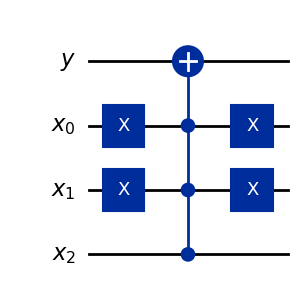

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
# 3-qubit f(100)=1 의 그로버 오라클 회로를 구현하는 함수
def grover_oracle_circuit():
    n = 3
    qy = QuantumRegister(1, 'y')
    qx = QuantumRegister(n, 'x')
    qc = QuantumCircuit(qy, qx) # qc 라는 이름의 n+1큐비트 양자 회로 객체를 생성
    # implement |x,y> ->|x, y XOR f(X)>
    # where f(100) = 1, f(x) = 0 otherwise
    qc.x([qx[1],qx[0]])      # qx[1], qx[0] 큐비트의 상태를 반전
    qc.mcx(list(qx),qy)      # 제어 큐비트 qx[0,1,2], 타겟 큐비트 qy 인 MCX gate
    # Uf|x,y>=|x,y XOR f(x)가 되도록 qx 를 uncomputation
    qc.x([qx[1],qx[0]])      # qx[1], qx[0] 큐비트의 상태를 반전하여 원상태로 복귀
    qc.name = 'Oracle'
    return qc                # qc 객체를 반환

circuit = grover_oracle_circuit() # 함수를 호출하여 회로를 표현하는 객체를 생성
circuit.draw(output='mpl') # circuit 회로를 matplot library 형식의 그림 화일로 출력

### 5.3.2 그로버 확산자 회로의 구현 함수

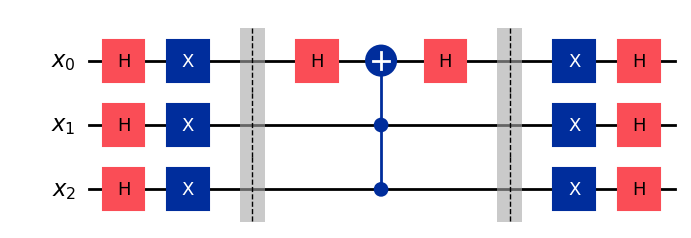

In [ ]:
# n-큐비트 확산자 회로를 생성하여 반환하는 함수 diffuser_circuit()을 선언
# diffusion circuit for n qubits
def diffuser_circuit(n):
    x = QuantumRegister(n,'x')
    qc = QuantumCircuit(x) # n 큐비트 회로 객체 생성
    qc.h(x)                # 모든 큐비트에 H
    qc.x(x)                # 모든 큐비트에 X

    qc.barrier()
    qc.h(x[0])             # x0 (target 큐비트) 에만 H
    qc.mcx(x[1:n], x[0])   # 제어 큐비트 x[1,2,...,n-1], 타겟 큐비트 x[0] 인 다중제어 X gate
    qc.h(x[0])             # x0 (target 큐비트) 에만 H
    qc.barrier()           # HXH=Z 이기 때문에 이 결과는 다중제어-Z gate 와 같다.

    qc.x(x)                # 모든 큐비트에 X
    qc.h(x)                # 모든 큐비트에 H

    qc.name = "Diffuser"
    return qc

circuit = diffuser_circuit(3) # 함수를 호출하여 회로를 표현하는 객체를 생성
circuit.draw(output='mpl') # circuit 회로를 matplot library 형식의 그림 화일로 출력

### 5.3.3 그로버 반복 회로의 구현

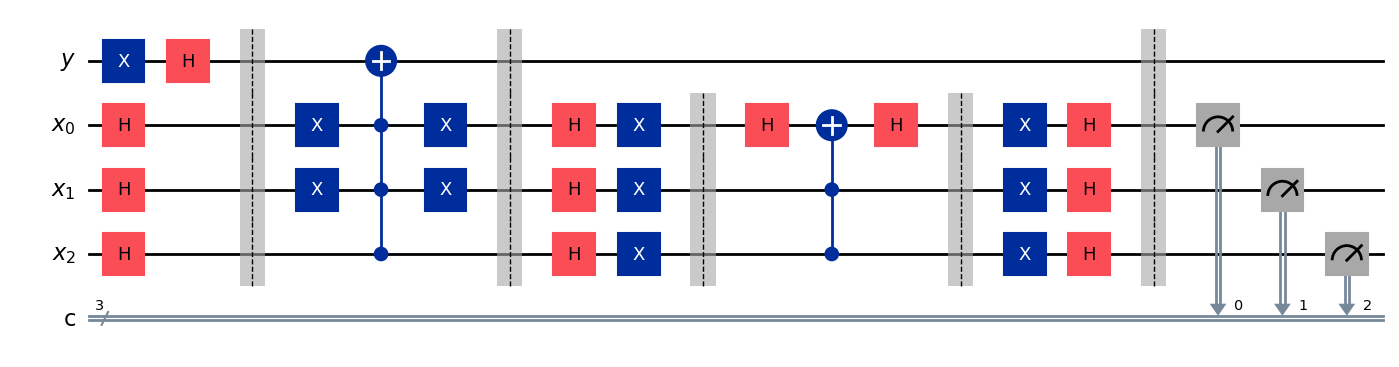

In [ ]:
# 그로버 오라클 함수와 디퓨저 함수를 1번 호출하여 그로버 회로를 circuit 이라는 이름의 객체로 구현
n = 3
qx = QuantumRegister(n,'x')  # n 큐비트의 양자 레지스터 객체를 qx 라는 이름으로 생성, 회로에는 'x'로 표시
qy = QuantumRegister(1,'y')  # 1 큐비트의 양자 레지스터 객체를 qy 라는 이름으로 생성, 회로에는 'y'로 표시
c = ClassicalRegister(n,'c') # 1 비트의 고전 레지스터 객체를 c 라는 이름으로 생성, 회로에는 'c'로 표시
circuit = QuantumCircuit(qy, qx, c) # qy,qx,c 를 가지는 양자 회로를 circuit 이라는 이름의 객체로 생성
circuit.x(qy)                 # qy 큐비트에 X gate -> qy 큐비트 상태가 |1> 이 됨
circuit.h(qy)                 # qy 큐비트에 H gate -> qy 큐비트 상태가 |-> 이 됨
circuit.h(qx)                 # qx 의 모든 큐비트에 H gate 적용
circuit.barrier()
for _ in range (1):           # 1번 반복
# grover_oracle_circuit() 을 호출하여 오라클 회로를 circuit 에 추가
    circuit.compose(grover_oracle_circuit(), range(n+1), inplace=True)
    circuit.barrier()
# diffuser_circuit() 을 호출하여 디퓨저 회로를 circuit 에 추가
    circuit.compose(diffuser_circuit(n), range(1,n+1), inplace=True)
    circuit.barrier()

circuit.measure(qx,c)              # qx 레지스터의 모든 큐비트들을 측정하여 c 레지스터로 읽는 회로를 구현
circuit.draw(fold=-1,output='mpl') # circuit 회로를 matplot library 형식의 그림 화일로 출력

## 5.4 그로버 알고리즘 회로의 측정

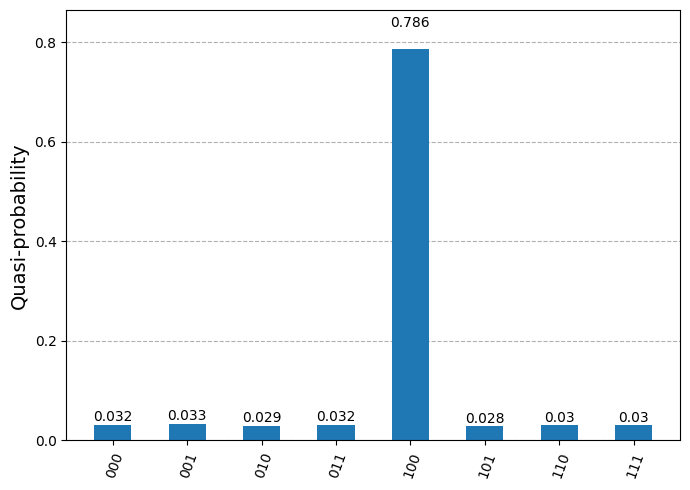

In [ ]:
# AerSimulator 를 이용하여 circuit 회로를 측정한 결과를 출력
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator

aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)

isa_circuit = pm.run(circuit)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=10000)
result = job.result()
count = result[0].data.c.get_counts()

from qiskit.visualization import plot_distribution
plot_distribution(count)
# 시뮬레이션 결과 정답인 100이 측정되는 빈도가 0.77 정도로 나타남.
# sin**2(3*theta) = sin**(3sin**-1(1/sqrt(8)))~0.78 그로버 회로가 정상적으로 작동하였음을 보여줌.

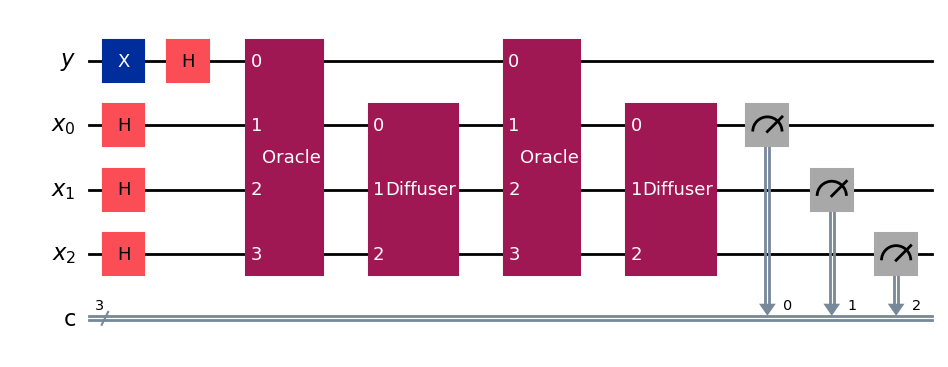

In [ ]:
# 그로버 오라클 함수와 디퓨저 함수를 2번 호출하여 그로버 회로를 circuit 이라는 이름의 객체로 구현
n = 3
qx = QuantumRegister(n,'x')  # n 큐비트의 양자 레지스터 객체를 qx 라는 이름으로 생성, 회로에는 'x'로 표시
qy = QuantumRegister(1,'y')  # 1 큐비트의 양자 레지스터 객체를 qy 라는 이름으로 생성, 회로에는 'y'로 표시
c = ClassicalRegister(n,'c') # 1 비트의 고전 레지스터 객체를 c 라는 이름으로 생성, 회로에는 'c'로 표시
circuit = QuantumCircuit(qy, qx, c) # qy,qx,c 를 가지는 양자 회로를 circuit 이라는 이름의 객체로 생성
circuit.x(0)                 # 0번 큐비트에 X gate -> 0번 큐비트 상태가 |1> 이 됨
circuit.h(0)                 # 0번 큐비트에 H gate -> 0번 큐비트 상태가 |-> 이 됨
circuit.h(qx)                # qx 의 모든 큐비트에 H gate 적용

for _ in range (2):         # 2번 반복
# grover_oracle_circuit() 을 호출하여 오라클 회로를 circuit 에 추가
    circuit.append(grover_oracle_circuit(), range(n+1))
# diffuser_circuit() 을 호출하여 디퓨저 회로를 circuit 에 추가
    circuit.append(diffuser_circuit(n), range(1,n+1))

circuit.measure(qx,c)      # qx 레지스터의 모든 큐비트들을 측정하여 c 레지스터로 읽는 회로를 구현
circuit.draw(fold=-1,output='mpl') # circuit 회로를 matplot library 형식의 그림 화일로 출력

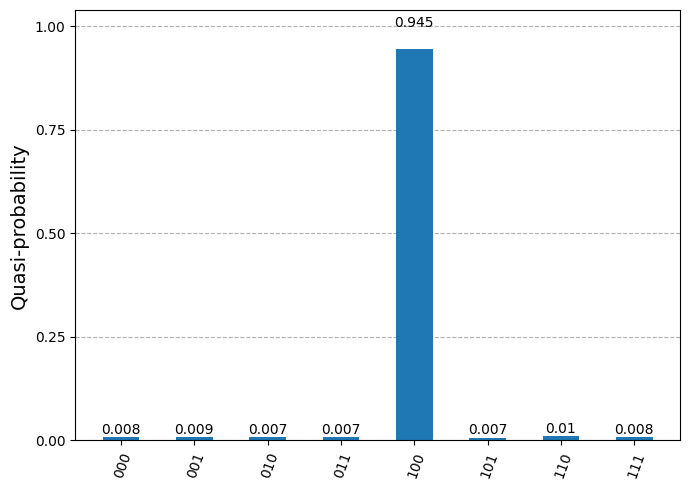

In [ ]:
# 그로버 반복을 2회 수행하는 회로 객체를 시뮬레이션한 결과
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator

aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)

isa_circuit = pm.run(circuit)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=10000)
result = job.result()
count = result[0].data.c.get_counts()

from qiskit.visualization import plot_distribution
plot_distribution(count)

현재 그로버 문제는 N=3, M=1인 경우,

최적의 그로버 반복 횟수 k_max = (pi/4)*(sqrt(8/1))=2 가 최적의 그로버 반복 횟수이다.

그로버 알고리즘에서 반복횟수가 최적횟수를 초과할 경우, 정답이 측정될 확률이 감소.

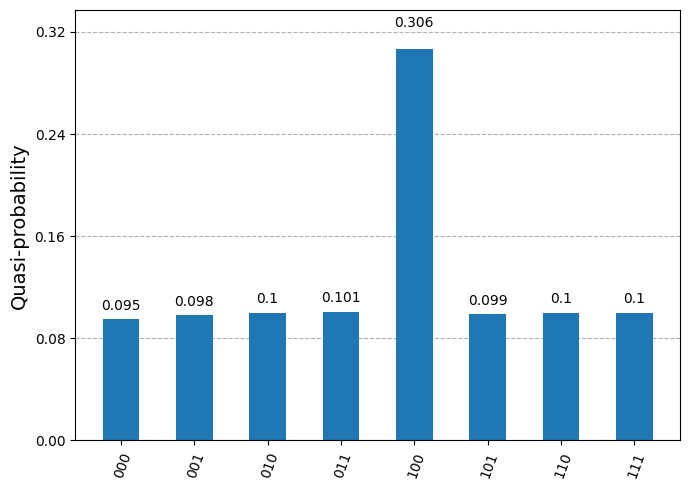

In [ ]:
for _ in range (3):         # 3번 반복
# grover_oracle_circuit() 을 호출하여 오라클 회로를 circuit 에 추가
    circuit.append(grover_oracle_circuit(), range(n+1))
# diffuser_circuit() 을 호출하여 디퓨저 회로를 circuit 에 추가
    circuit.append(diffuser_circuit(n), range(1,n+1))

circuit.measure(qx,c)      # qx 레지스터의 모든 큐비트들을 측정하여 c 레지스터로 읽는 회로를 구현
circuit.draw(fold=-1,output='mpl') # circuit 회로를 matplot library 형식의 그림 화일로 출력

aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)

isa_circuit = pm.run(circuit)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=10000)
result = job.result()
count = result[0].data.c.get_counts()

from qiskit.visualization import plot_distribution
plot_distribution(count)
# 그로버 반보글 두 번 반복한 회로의 결과보다 정답이 측정되는 빈도가 낮아짐.

## 5.5 불켜기 게임

### 5.5.1 3x3 보드 불켜기 게임의 문제 구성
- 램프 점등: i번 방의 점등 상태를 'i번 램프가 1(켜짐)/0(꺼짐)이다.'
- 스위치 동작: i번 방 스위치의 작동 상태를 'i번 스위치가 1(작동)/0(미작동)이다.' 라고 표현.

In [ ]:
!pip install qiskit qiskit-ibm-runtime pylatexenc qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.7 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256

In [ ]:
# 불켜기 문제 1단계 version 1
adj_rooms = [[1,3],   #  i번째 방과 j번째 방이 인접하면
            [0,2,4],  #  adj_rooms[i] == j
            [1,5],
            [0,4,6],
            [1,3,5,7],
            [2,4,8],
            [3,7],
            [4,6,8],
            [5,7]]

# 3x3 형태로 램프 on/off 상태를 1/0 으로 표시
def show_lights(rooms, str=''):
    print(str)
    for i in range(3):
      for j in range(3):
        print(rooms[i*3+j], end=' ')
      print()
    print()
    return

# 스위치의 동작을 단계별로 표시함
def switch_lights(switch,rooms):
    show_lights(rooms, 'initial status :')
    # 스위치를 동작하여 램프를 반전
    for i in range(9):
        if switch[i] == 1:
        # i번 스위치가 1이면 i번 방과 인접한 방의 상태를
        # 0<->1 로 반전
            rooms[i] = 1-rooms[i]
            for c in adj_rooms[i]:
                rooms[c] = 1-rooms[c]
            show_lights(rooms, f'after switch {i} is on :')
    return

In [ ]:
# problem specification
problem = [0, 0, 0, 1, 0, 1, 1, 1, 0]
# proposed solution
switch_answer = [0, 0, 1, 1, 0, 0, 1, 0, 1]

print('switches = ', switch_answer)
print('problem = ', problem)

#apply the answer to the problem
switch_lights(switch_answer,problem)

solved = True
for r in problem:
  if r != 1:
    solved = False
    print('The problem is not solved.')
    break
if solved:
  print('lights are all turned on.')
  print('press the switches ', end='')
  for i in range(len(switch_answer)):
    if switch_answer[i] == 1:
      print(i, end=',')
  print(' to turn all the lights.')

switches =  [0, 0, 1, 1, 0, 0, 1, 0, 1]
problem =  [0, 0, 0, 1, 0, 1, 1, 1, 0]
initial status :
0 0 0 
1 0 1 
1 1 0 

after switch 2 is on :
0 1 1 
1 0 0 
1 1 0 

after switch 3 is on :
1 1 1 
0 1 0 
0 1 0 

after switch 6 is on :
1 1 1 
1 1 0 
1 0 0 

after switch 8 is on :
1 1 1 
1 1 1 
1 1 1 

lights are all turned on.
press the switches 2,3,6,8, to turn all the lights.
